In [16]:
import numpy as np

# Load the saved .npz file
data = np.load('/pscratch/sd/n/niranjan/output/prediction_combined_ambr01_ambr03_40e.npz', allow_pickle=True)

# List all the keys in the .npz file
print("Keys in the .npz file:", data.files)

# Loop through each key and display its content
for key in data.files:
    print(f"\nKey: {key}")


Keys in the .npz file: ['time', 'images', 'metadata']

Key: time

Key: images

Key: metadata


In [ ]:
# Violin Plots

R² score: 0.6174
R² score: 0.6620
R² score: 0.6439
R² score: 0.5264
R² score: 0.6122


Text(0.5, 1.0, 'Violin Plot: ')

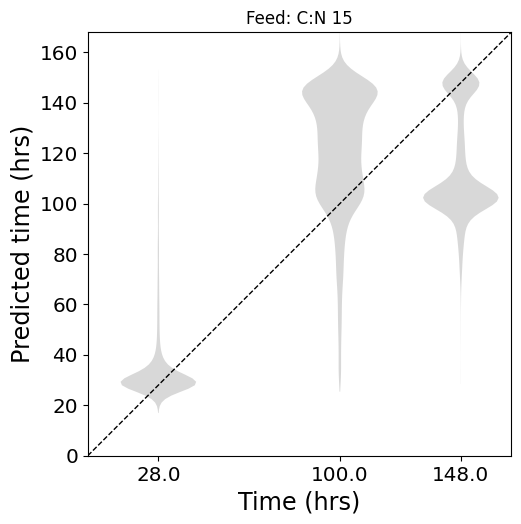

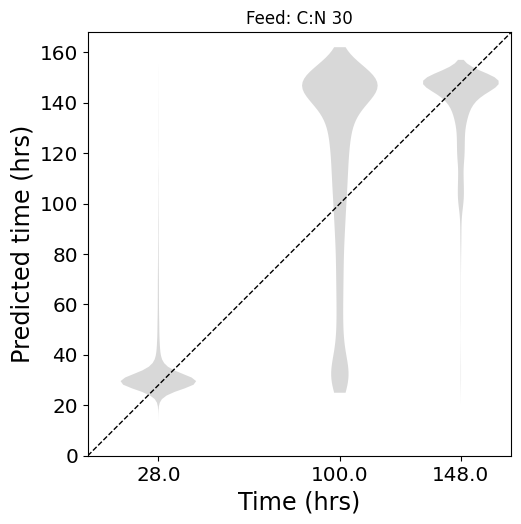

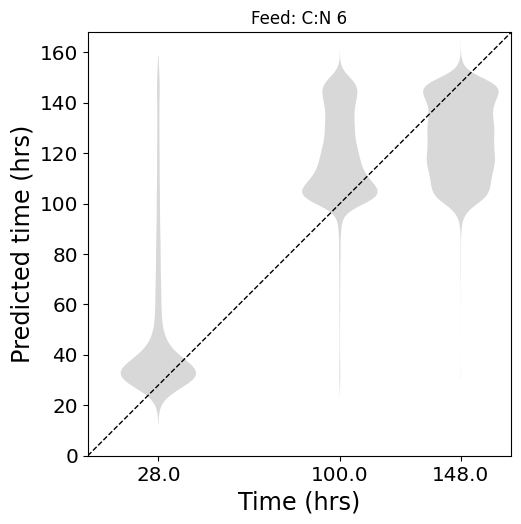

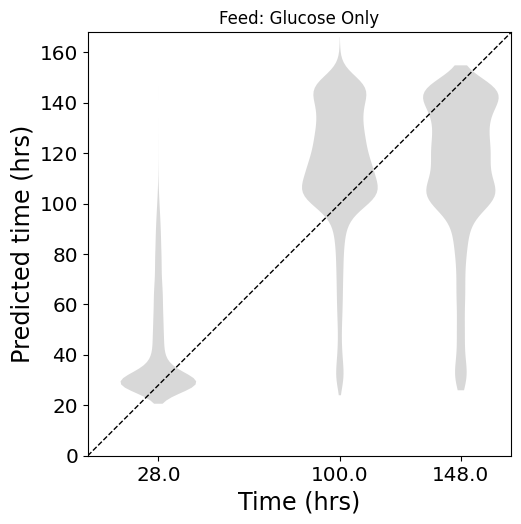

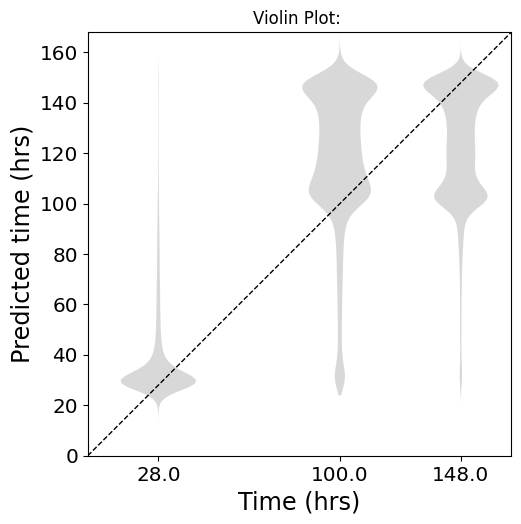

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


def plot_true_vs_pred_and_violin(file_path, feed_classes, feed_type=None, ax=None, expand_lims=False):
    if ax is None:
        ax = plt.gca()
    
    npz_file = np.load(file_path, allow_pickle=True)
    time_data = npz_file['time']
    true_labels = time_data.item().get('labels')
    pred_values = time_data.item().get('output')
    feed_data = npz_file['feed']  
    feed = feed_data.item().get('labels')
    feed_label = feed_classes[feed_type]

    if feed_type is not None:
        feed_mask = feed == feed_type
        
        if not np.any(feed_mask):
            print(f"Warning: No matching entries found for feed '{feed_type}'. Skipping plot.")
            return
        
        true_labels = true_labels[feed_mask]
        pred_values = pred_values[feed_mask]
    
    unique_labels = np.unique(true_labels)
    
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    non_empty_groups = False
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            non_empty_groups = True
            #print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")
    
    if not non_empty_groups:
        print(f"Skipping plot for {feed_type} as there are no non-empty groups.")
        return

    # Plot the violins
    violin_parts = ax.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  
        widths=10 if expand_lims else 30,   
        showmeans=False,                    
        showmedians=False,                 
        showextrema=False,                  
        bw_method='silverman'              
    )
    
    ax.set_aspect('equal', adjustable='box', anchor='C')
    ax.set_xticks(unique_labels)  # Label x-axis with unique true labels
    ax.set_xticklabels([str(_) for _ in unique_labels])
    ax.set_xlabel('Time (hrs)', fontsize='xx-large')
    ax.set_ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax.tick_params('both', labelsize='x-large')

    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   
        vp.set_edgecolor('none')  
        vp.set_linewidth(1.5)     

    if expand_lims:
        x_min = y_min = min(unique_labels) - 20
        x_max = y_max = max(unique_labels) + 20
    else:
        x_min = y_min = 0
        x_max = y_max = max(unique_labels) + 20

    ax.plot([x_min, x_max], [x_min, y_max], color='k', linestyle='--', linewidth=1, label="y = x")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    r2 = r2_score(true_labels, pred_values)
    print(f"R² score: {r2:.4f}")
    
    # plt.title(f'Feed: {feed_label}')
    # plt.savefig(f"ambr03_violin_{feed_label}.png", dpi=100)

file_path = '/pscratch/sd/n/niranjan/output/prediction_s2_ambr01_1e-3_40e.npz'

npz_file = np.load(file_path, allow_pickle=True)
feed_data = npz_file['feed']

labels = feed_data.item().get('labels')
feeds_to_plot = np.unique(labels) 

feed_classes = feed_data.item().get('classes')

for feed in feeds_to_plot:
    fig, ax = plt.subplots(figsize=(7, 5.5))
    plot_true_vs_pred_and_violin(file_path, feed_classes, feed)
    feed_label = feed_classes[feed]
    plt.title(f'Feed: {feed_label}')
    plt.savefig(f"ambr01_s2_violin_{feed_label}.png", dpi=100)


fig, ax = plt.subplots(figsize=(7, 5.5))
plot_true_vs_pred_and_violin(file_path, feed_classes)
plt.title(f'Violin Plot: ')
#plt.savefig(f"ambr03_violin.png", dpi=100)


In [ ]:
# confi

Overall Accuracy: 0.2363
Overall Accuracy: 0.3407
Overall Accuracy: 0.3437
Overall Accuracy: 0.3049


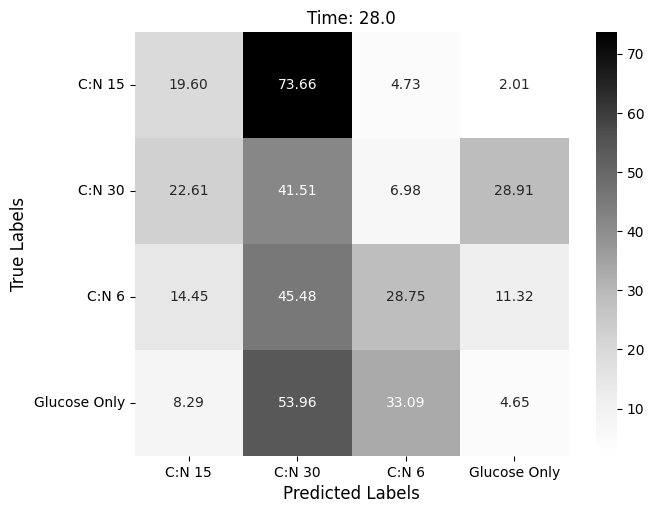

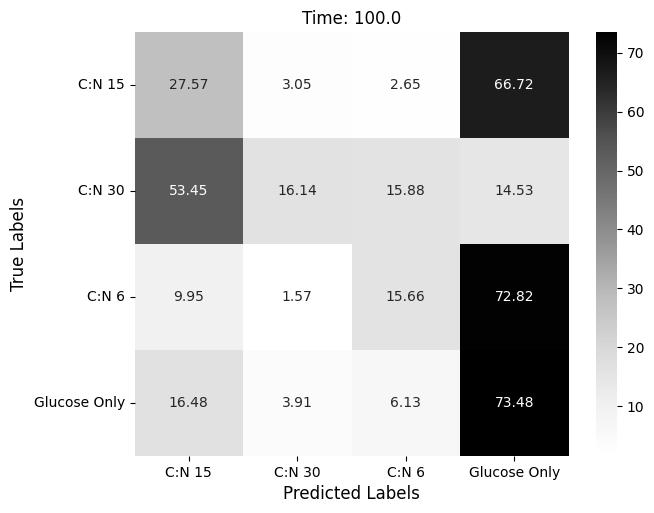

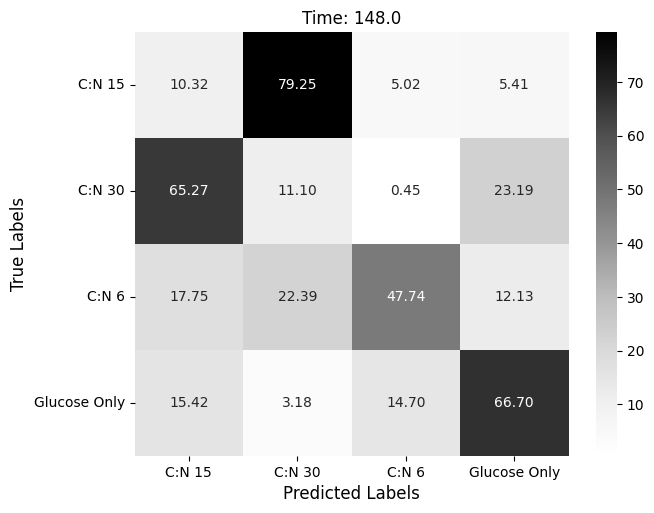

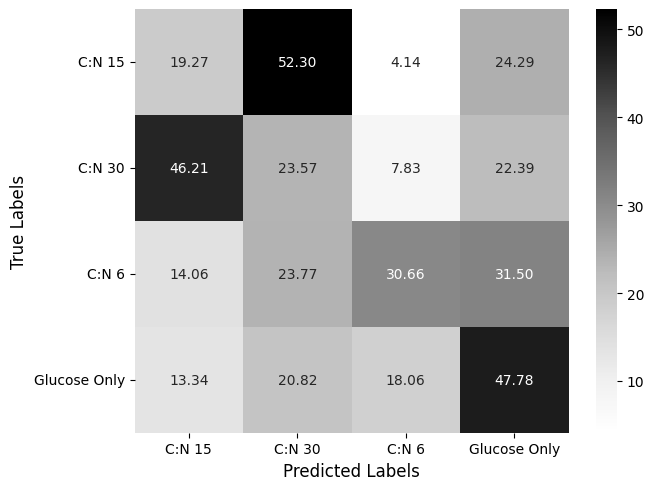

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import os

def plot_confusion_matrix(npz_file_path, time_type=None, save_name=None):
    npz_file = np.load(npz_file_path, allow_pickle=True)

    feed_data = npz_file['feed']
    true_labels = feed_data.item().get('labels')
    pred_labels = feed_data.item().get('pred')
    time_data = npz_file['time']  
    time = time_data.item().get('labels')

    if time_type is not None:
        time_mask = time == time_type
        if not np.any(time_mask):
            print(f"Warning: No matching entries found for feed '{feed_type}'. Skipping plot.")
            return 
        true_labels = true_labels[time_mask]
        pred_labels = pred_labels[time_mask]
    
    cm = confusion_matrix(true_labels, pred_labels)

    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(7, 5.5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Greys", 
                xticklabels=custom_labels, yticklabels=custom_labels)

    plt.ylabel('True Labels', fontsize=12)
    plt.xlabel('Predicted Labels', fontsize=12)
    
    plt.xticks(rotation=0)  
    plt.yticks(rotation=0)  

    if save_name:
        save_path = os.path.join(os.getcwd(), save_name)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Confusion matrix saved to: {save_path}")

    accuracy = accuracy_score(true_labels, pred_labels)

    print(f'Overall Accuracy: {accuracy:.4f}')



npz_file_path = '/pscratch/sd/n/niranjan/output/prediction_s2_ambr01_1e-3_40e.npz'
npz_file = np.load(npz_file_path, allow_pickle=True)
time_data = npz_file['time']
labels = time_data.item().get('labels')
time_to_plot = np.unique(labels) 

feed_data = npz_file['feed']
feed_to_plot = feed_data.item().get('classes')

custom_labels = feed_to_plot

for time in time_to_plot:
    plot_confusion_matrix(npz_file_path, time)
    plt.title(f'Time: {time}')
    plt.savefig(f"ambr01_cm_{time}.png", dpi=100)

plot_confusion_matrix(npz_file_path)
#plt.savefig(f"ambr03_cm.png", dpi=100)


R² score: 0.8597


Text(0.5, 1.0, 'Violin Plot: ')

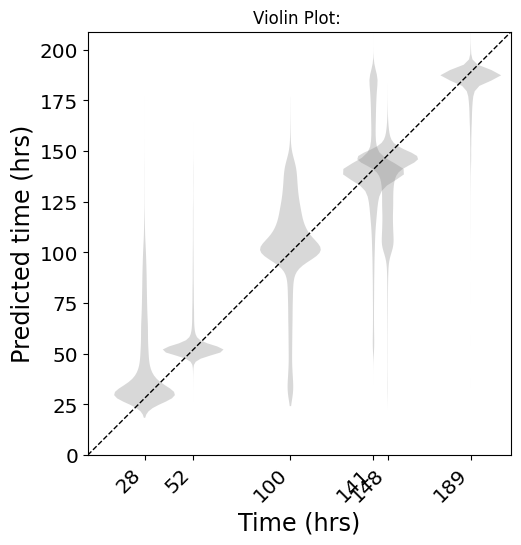

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


def plot_true_vs_pred_and_violin(file_path, feed_type=None, ax=None, expand_lims=False):
    if ax is None:
        ax = plt.gca()
    
    npz_file = np.load(file_path, allow_pickle=True)
    time_data = npz_file['time']
    true_labels = time_data.item().get('labels')
    pred_values = time_data.item().get('output')
    #feed_data = npz_file['feed']  
    #feed = feed_data.item().get('labels')
    #feed_label = feed_classes[feed_type]

    if feed_type is not None:
        feed_mask = feed == feed_type
        
        if not np.any(feed_mask):
            print(f"Warning: No matching entries found for feed '{feed_type}'. Skipping plot.")
            return
        
        true_labels = true_labels[feed_mask]
        pred_values = pred_values[feed_mask]
    
    unique_labels = np.unique(true_labels)
    
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    non_empty_groups = False
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            non_empty_groups = True
            #print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")
    
    if not non_empty_groups:
        print(f"Skipping plot for {feed_type} as there are no non-empty groups.")
        return

    # Plot the violins
    violin_parts = ax.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  
        widths=10 if expand_lims else 30,   
        showmeans=False,                    
        showmedians=False,                 
        showextrema=False,                  
        bw_method='silverman'              
    )
    
    ax.set_aspect('equal', adjustable='box', anchor='C')
    ax.set_xticks(unique_labels)  # Label x-axis with unique true labels
    ax.set_xticklabels([str(_) for _ in unique_labels.astype(int)], rotation=45, ha='right')
    ax.set_xlabel('Time (hrs)', fontsize='xx-large')
    ax.set_ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax.tick_params('both', labelsize='x-large')

    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   
        vp.set_edgecolor('none')  
        vp.set_linewidth(1.5)     

    if expand_lims:
        x_min = y_min = min(unique_labels) - 20
        x_max = y_max = max(unique_labels) + 20
    else:
        x_min = y_min = 0
        x_max = y_max = max(unique_labels) + 20

    ax.plot([x_min, x_max], [x_min, y_max], color='k', linestyle='--', linewidth=1, label="y = x")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    r2 = r2_score(true_labels, pred_values)
    print(f"R² score: {r2:.4f}")
    
    # plt.title(f'Feed: {feed_label}')
    # plt.savefig(f"ambr03_violin_{feed_label}.png", dpi=100)

file_path = '/pscratch/sd/n/niranjan/output/prediction_combined_ambr01_ambr03_40e.npz'

npz_file = np.load(file_path, allow_pickle=True)
# feed_data = npz_file['feed']

# labels = feed_data.item().get('labels')
# feeds_to_plot = np.unique(labels) 

# feed_classes = feed_data.item().get('classes')

# for feed in feeds_to_plot:
#     fig, ax = plt.subplots(figsize=(7, 5.5))
#     plot_true_vs_pred_and_violin(file_path, feed_classes, feed)
#     feed_label = feed_classes[feed]
#     plt.title(f'Feed: {feed_label}')
#     #plt.savefig(f"ambr03_violin_{feed_label}.png", dpi=100)


fig, ax = plt.subplots(figsize=(7, 5.5))
plot_true_vs_pred_and_violin(file_path)
plt.title(f'Violin Plot: ')
#plt.savefig(f"ambr03_violin.png", dpi=100)


R² score: -1.3663


Text(0.5, 1.0, 'Violin Plot: ')

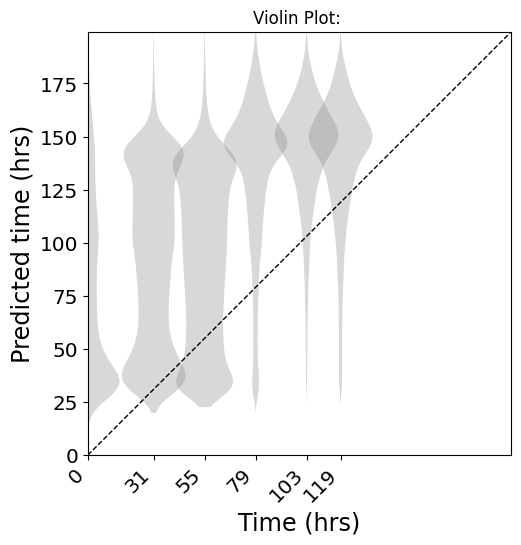

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

VP = None
def plot_true_vs_pred_and_violin(file_path, feed_type=None, ax=None, expand_lims=False):
    if ax is None:
        ax = plt.gca()
    
    npz_file = np.load(file_path, allow_pickle=True)
    time_data = npz_file['time']
    true_labels = time_data.item().get('labels')
    pred_values = time_data.item().get('output')
    #feed_data = npz_file['feed']  
    #feed = feed_data.item().get('labels')
    #feed_label = feed_classes[feed_type]

    if feed_type is not None:
        feed_mask = feed == feed_type
        
        if not np.any(feed_mask):
            print(f"Warning: No matching entries found for feed '{feed_type}'. Skipping plot.")
            return
        
        true_labels = true_labels[feed_mask]
        pred_values = pred_values[feed_mask]
    
    unique_labels = np.unique(true_labels)
    
    grouped_pred_values = [pred_values[true_labels == label] for label in unique_labels]

    non_empty_groups = False
    for label, group in zip(unique_labels, grouped_pred_values):
        if len(group) > 0:
            non_empty_groups = True
            #print(f"True Label {label} - Group Size: {len(group)} - Predicted Values Range: {np.min(group)} to {np.max(group)}")
        else:
            print(f"Warning: No predicted values found for True Label {label}")
    
    if not non_empty_groups:
        print(f"Skipping plot for {feed_type} as there are no non-empty groups.")
        return

    # Plot the violins
    violin_parts = ax.violinplot(
        grouped_pred_values, 
        positions=unique_labels,  
        widths=10 if expand_lims else 30,   
        showmeans=False,                    
        showmedians=False,                 
        showextrema=False,                  
        bw_method='silverman'              
    )
    
    ax.set_aspect('equal', adjustable='box', anchor='C')
    ax.set_xticks(unique_labels.astype(int))  # Label x-axis with unique true labels
    ax.set_xticklabels([str(_) for _ in unique_labels.astype(int)], rotation=45, ha='right')
    ax.set_xlabel('Time (hrs)', fontsize='xx-large')
    ax.set_ylabel('Predicted time (hrs)', fontsize='xx-large')
    ax.tick_params('both', labelsize='x-large')

    global VP
    for vp in violin_parts['bodies']:
        vp.set_facecolor('grey')   
        vp.set_edgecolor('none')  
        vp.set_linewidth(1.5)   
        VP = vp

    all_labels = np.concatenate((true_labels, pred_values))
    
    percentile_ = np.percentile(all_labels, 99) ###
    
    if expand_lims:
        x_min = y_min = min(all_labels) - 20
        x_max = y_max = max(all_labels) + 20
    else:
        x_min = y_min = 0
        #x_max = y_max = max(all_labels) + 20
        x_max = y_max = percentile_ + 20
        
    ax.plot([x_min, x_max], [x_min, y_max], color='k', linestyle='--', linewidth=1, label="y = x")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    r2 = r2_score(true_labels, pred_values)
    print(f"R² score: {r2:.4f}")
    # plt.title(f'Feed: {feed_label}')
    # plt.savefig(f"ambr03_violin_{feed_label}.png", dpi=100)

file_path = '/pscratch/sd/n/niranjan/output/prediction_ABF_FA_ambr01_combined_ambr01_ambr03_40e.npz'

npz_file = np.load(file_path, allow_pickle=True)
# feed_data = npz_file['feed']

# labels = feed_data.item().get('labels')
# feeds_to_plot = np.unique(labels) 

# feed_classes = feed_data.item().get('classes')

# for feed in feeds_to_plot:
#     fig, ax = plt.subplots(figsize=(7, 5.5))
#     plot_true_vs_pred_and_violin(file_path, feed_classes, feed)
#     feed_label = feed_classes[feed]
#     plt.title(f'Feed: {feed_label}')
#     #plt.savefig(f"ambr03_violin_{feed_label}.png", dpi=100)


fig, ax = plt.subplots(figsize=(7, 5.5))
plot_true_vs_pred_and_violin(file_path)
plt.title(f'Violin Plot: ')
#plt.savefig(f"ambr03_violin.png", dpi=100)





In [1]:
# doing stuff for embeddings

In [2]:
import numpy as np
from umap import UMAP

def compute_embedding(data, metric='euclidean', n_components=2, n_neighbors=20, min_dist=0.1):
    """
    Compute UMAP embeddings and save to a file for reuse.
    """
    umap = UMAP(
        n_components=n_components,
        metric=metric,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        verbose=True
    )
    emb = umap.fit_transform(data)
    return emb

# Load data from the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/embeddings_combined_ambr01_ambr03_40e.npz"
data = np.load(npz_file_path, allow_pickle=True)
time_data = data['time']

# Extract predictions and true labels
true_labels = time_data.item().get('labels')
predictions = time_data.item().get('output')  # Replace with actual key if different

# Compute UMAP embeddings
umap_embeddings = compute_embedding(predictions, min_dist=0.5)

# Save embeddings and labels to a file
np.savez("umap_embeddings.npz", embeddings=umap_embeddings, labels=true_labels)


/pscratch/sd/n/niranjan/.conda/envs/clonevsc0/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b

UMAP(min_dist=0.5, n_neighbors=20, verbose=True)
Wed Nov 20 14:00:44 2024 Construct fuzzy simplicial set
Wed Nov 20 14:00:44 2024 Finding Nearest Neighbors
Wed Nov 20 14:00:44 2024 Building RP forest with 24 trees
Wed Nov 20 14:00:54 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Wed Nov 20 14:01:25 2024 Finished Nearest Neighbor Search
Wed Nov 20 14:01:29 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Nov 20 14:03:48 2024 Finished embedding


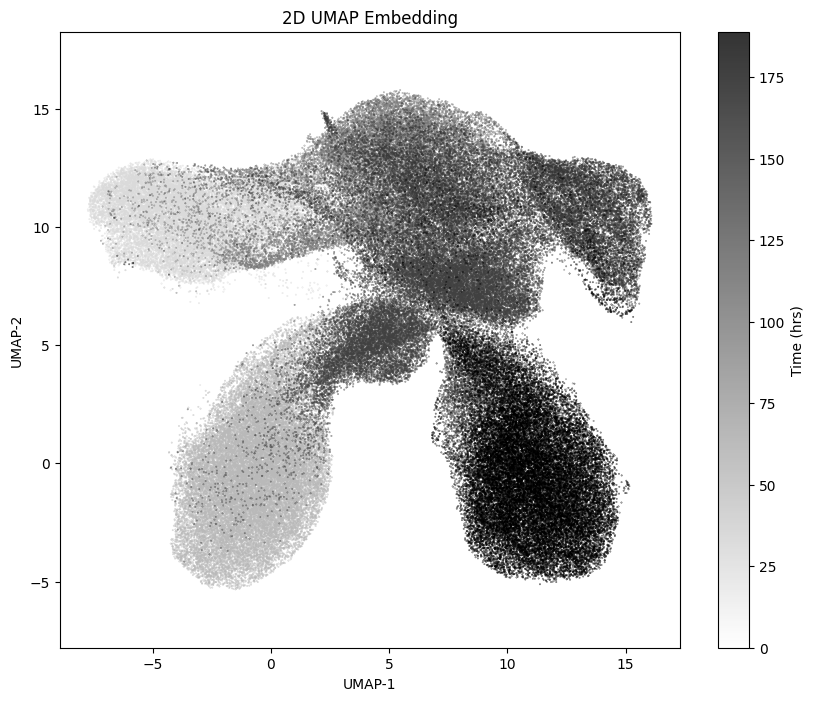

In [4]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def plot_umap(embeddings, labels, title="2D UMAP Embedding"):
    """
    Plot the UMAP embeddings with true labels for visualization.
    Ensure value 0 is white and others are in greyscale.
    """
    plt.figure(figsize=(10, 8))
    
    # Create a custom colormap where 0 is white
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom_greys', 
        [(0, 'white'), (1, 'black')]  # Define color stops
    )

    # Normalize labels to ensure correct mapping
    norm = mcolors.Normalize(vmin=0, vmax=np.max(labels))
    
    # Create a scatter plot
    scatter = plt.scatter(
        embeddings[:, 0],  # X-coordinate of embeddings
        embeddings[:, 1],  # Y-coordinate of embeddings
        c=labels,  # Color by labels
        cmap=cmap,  # Use the custom colormap
        norm=norm,  # Normalize the data to match the colormap range
        s=0.1,  # Point size
        alpha=0.8  # Transparency
    )

    # Add colorbar for reference
    cbar = plt.colorbar(scatter, label="Time (hrs)")
    
    plt.axis('equal')
    
    plt.title(title)
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")

    
# Plot the UMAP embeddings
plot_umap(umap_embeddings, true_labels)


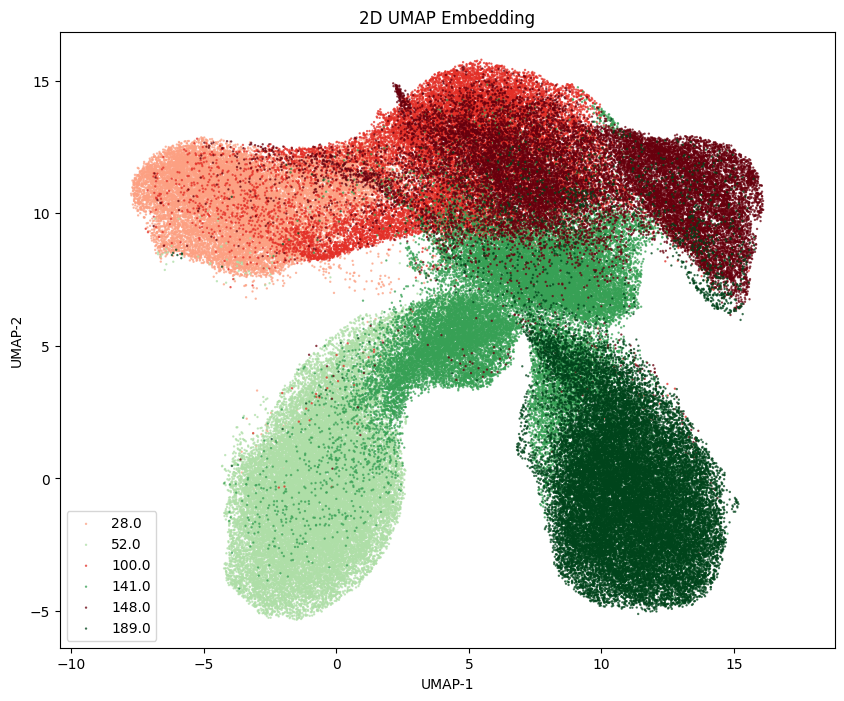

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.lines import Line2D  # For custom legend handles


# Load the saved UMAP embeddings and labels
npz_file_path = "umap_embeddings.npz"
data = np.load(npz_file_path)

umap_embeddings = data['embeddings']
true_labels = data['labels'].flatten()  # Flatten labels to make them 1D

def label_to_color_gradient(label, red_labels, green_labels):
    """ 
    Map labels to a gradient color based on predefined red and green labels.
    - Red gradient for [28., 100., 148.]
    - Green gradient for [52., 141., 189.]
    """
    if label in red_labels:
        # Apply a red gradient based on the label's position within red_labels
        red_index = red_labels.index(label)
        red_gradient = cm.Reds((red_index + 1) / len(red_labels))  # Normalize the gradient
        return red_gradient
    elif label in green_labels:
        # Apply a green gradient based on the label's position within green_labels
        green_index = green_labels.index(label)
        green_gradient = cm.Greens((green_index + 1) / len(green_labels))  # Normalize the gradient
        return green_gradient
    else:
        # Default color for other labels (gray)
        return mcolors.to_rgba('gray', alpha=0.3)

def plot_umap(embeddings, labels, title="2D UMAP Embedding"):
    """
    Plot the UMAP embeddings with true labels for visualization.
    Apply red and green gradients for specific labels and other labels as gray.
    """
    plt.figure(figsize=(10, 8))

    # Define the red and green label groups
    red_labels = [28., 100., 148.]
    green_labels = [52., 141., 189.]

    # Create a list of colors based on the labels using the custom color gradient function
    colors = np.array([label_to_color_gradient(label, red_labels, green_labels) for label in labels])

    for label in np.unique(labels):
        mask = labels == label
        # Create scatter plot with the generated colors
        scatter = plt.scatter(
            embeddings[mask, 0],  # X-coordinate of embeddings
            embeddings[mask, 1],  # Y-coordinate of embeddings
            c=colors[mask],  # Color by custom labels with gradients
            s=0.5,  # Smaller points
            alpha=0.7,  # Slight transparency for all points
            label=label,
        )
    
    red_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Reds(0.99), markersize=45, label='Red Labels (28, 100, 148)')
    
    # Green legend (with a bigger marker size)
    green_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Greens(0.99), markersize=45, label='Green Labels (52, 141, 189)')
    
    # Create two separate legend entries
    plt.legend(handles=[red_patch], title="Red Labels", loc='upper left')
    plt.legend(handles=[green_patch], title="Green Labels", loc='upper right') 
    
    
    plt.axis('equal')
    
    plt.title(title)
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend()

# Plot the UMAP embeddings with custom color gradients for specific labels
plot_umap(umap_embeddings, true_labels)


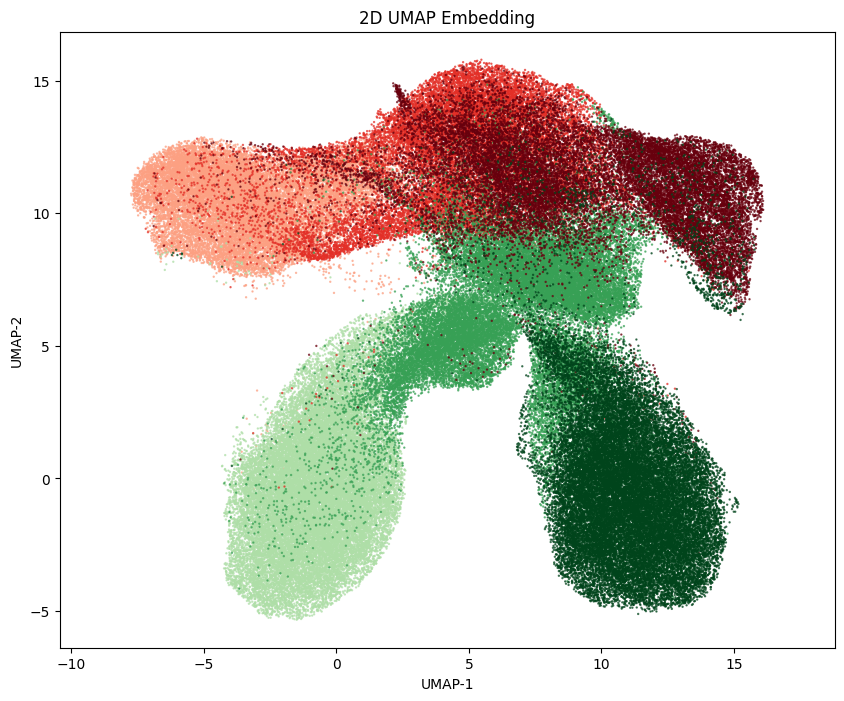

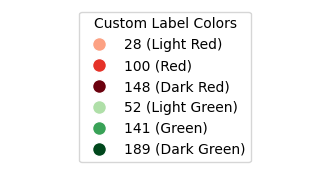

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.lines import Line2D  # For custom legend handles

# Load the saved UMAP embeddings and labels
npz_file_path = "umap_embeddings.npz"
data = np.load(npz_file_path)

umap_embeddings = data['embeddings']
true_labels = data['labels'].flatten()  # Flatten labels to make them 1D


def label_to_color_gradient(label, red_labels, green_labels):
    """ 
    Map labels to a gradient color based on predefined red and green labels.
    """
    if label in red_labels:
        # Apply a red gradient based on the label's position within red_labels
        red_index = red_labels.index(label)
        red_gradient = cm.Reds((red_index + 1) / len(red_labels))  # Normalize the gradient
        return red_gradient
    elif label in green_labels:
        # Apply a green gradient based on the label's position within green_labels
        green_index = green_labels.index(label)
        green_gradient = cm.Greens((green_index + 1) / len(green_labels))  # Normalize the gradient
        return green_gradient
    else:
        # Default color for other labels (gray)
        return mcolors.to_rgba('gray', alpha=0.3)


def plot_umap(embeddings, labels, title="2D UMAP Embedding"):
    """
    Plot the UMAP embeddings with true labels for visualization.
    Apply red and green gradients for specific labels and other labels as gray.
    """
    plt.figure(figsize=(10, 8))

    # Define the red and green label groups
    red_labels = [28., 100., 148.]
    green_labels = [52., 141., 189.]

    # Create a list of colors based on the labels using the custom color gradient function
    colors = np.array([label_to_color_gradient(label, red_labels, green_labels) for label in labels])

    for label in np.unique(labels):
        mask = labels == label
        # Create scatter plot with the generated colors
        plt.scatter(
            embeddings[mask, 0],  # X-coordinate of embeddings
            embeddings[mask, 1],  # Y-coordinate of embeddings
            c=colors[mask],  # Color by custom labels with gradients
            s=0.5,  # Smaller points
            alpha=0.7,  # Slight transparency for all points
        )

    plt.axis('equal')
    plt.title(title)
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.show()


def create_legend():
    """
    Create and display a separate legend for the plot.
    """
    # Custom legend handles for red gradient
    red_light = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Reds(0.33), markersize=10, label='28 (Light Red)')
    red_medium = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Reds(0.66), markersize=10, label='100 (Red)')
    red_dark = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Reds(0.99), markersize=10, label='148 (Dark Red)')

    # Custom legend handles for green gradient
    green_light = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Greens(0.33), markersize=10, label='52 (Light Green)')
    green_medium = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Greens(0.66), markersize=10, label='141 (Green)')
    green_dark = Line2D([0], [0], marker='o', color='w', markerfacecolor=cm.Greens(0.99), markersize=10, label='189 (Dark Green)')

    # Create a new figure for the legend
    fig = plt.figure(figsize=(4, 2))  # Adjust size as needed
    legend_handles = [red_light, red_medium, red_dark, green_light, green_medium, green_dark]
    legend_labels = [handle.get_label() for handle in legend_handles]

    # Add legend to the figure
    fig.legend(handles=legend_handles, labels=legend_labels, loc='center', title="Custom Label Colors")
    plt.axis('off')  # Turn off axes for the legend figure
    plt.show()


# Plot the UMAP embeddings with custom color gradients for specific labels
plot_umap(umap_embeddings, true_labels)

# Display the legend separately
create_legend()


In [7]:
import numpy as np
from umap import UMAP

def compute_embedding(data, metric='euclidean', n_components=2, n_neighbors=20, min_dist=0.1):
    """
    Compute UMAP embeddings and save to a file for reuse.
    """
    umap = UMAP(
        n_components=n_components,
        metric=metric,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        verbose=True
    )
    emb = umap.fit_transform(data)
    return emb

# Load data from the NPZ file
npz_file_path = "/pscratch/sd/n/niranjan/output/embeddings_ABF_FA_ambr01_combined_ambr01_ambr03_40e.npz"
data = np.load(npz_file_path, allow_pickle=True)
time_data = data['time']

# Extract predictions and true labels
true_labels = time_data.item().get('labels')
predictions = time_data.item().get('output')  # Replace with actual key if different

# Compute UMAP embeddings
umap_embeddings = compute_embedding(predictions)

# Save embeddings and labels to a file
np.savez("ambr01_ABF_FA_umap_embeddings.npz", embeddings=umap_embeddings, labels=true_labels)


/pscratch/sd/n/niranjan/.conda/envs/clonevsc0/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b

UMAP(n_neighbors=20, verbose=True)
Wed Nov 20 14:09:29 2024 Construct fuzzy simplicial set
Wed Nov 20 14:09:29 2024 Finding Nearest Neighbors
Wed Nov 20 14:09:29 2024 Building RP forest with 31 trees
Wed Nov 20 14:09:43 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Wed Nov 20 14:10:21 2024 Finished Nearest Neighbor Search
Wed Nov 20 14:10:23 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Nov 20 14:14:38 2024 Finished embedding


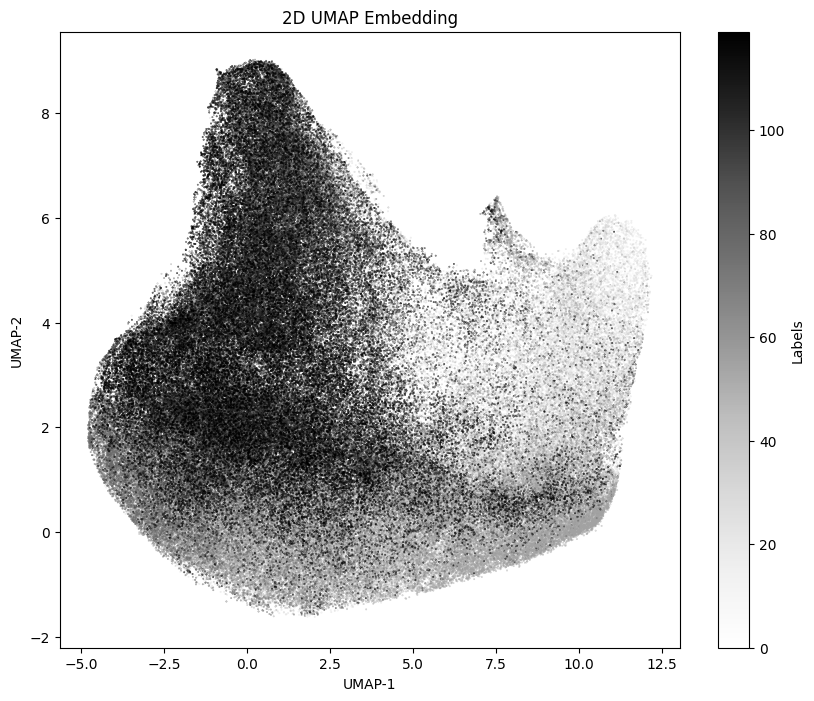

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved UMAP embeddings and labels
npz_file_path = "ambr01_ABF_FA_umap_embeddings.npz"
data = np.load(npz_file_path)

umap_embeddings = data['embeddings']
true_labels = data['labels'].flatten()  # Flatten labels to make them 1D

def plot_umap(embeddings, labels, title="2D UMAP Embedding"):
    """
    Plot the UMAP embeddings with true labels for visualization in greyscale.
    Adjust alpha transparency to avoid hiding lighter points behind darker ones.
    """
    plt.figure(figsize=(10, 8))
    
    # Create a scatter plot with varying alpha based on label intensity
    scatter = plt.scatter(
        embeddings[:, 0],  # X-coordinate of embeddings
        embeddings[:, 1],  # Y-coordinate of embeddings
        c=labels,  # Color by labels
        cmap='Greys',  # Use greyscale colormap
        s=0.1,  # Smaller points
        alpha=0.5,  # Slight transparency for all points
    )
    
    # Set the alpha transparency based on the labels (this avoids hiding lighter points)
    scatter.set_alpha(0.5 + (labels - np.min(labels)) / (np.max(labels) - np.min(labels)) * 0.5)

    plt.colorbar(scatter, label="Labels")
    plt.title(title)
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.show()

# Plot the UMAP embeddings
plot_umap(umap_embeddings, true_labels)


In [10]:
cp /pscratch/sd/n/niranjan/visualisation/13th_Nov.ipynb /pscratch/sd/n/niranjan/lmcontrol/notebooks/19_Nov_embs_cm_violins.ipynb